In [31]:
import numpy as np
import matplotlib.pyplot as plt
x=np.random.uniform(0,1,(100,))
y=np.sin(2*np.pi*x)+np.cos(2*np.pi*x)+np.random.normal(0,(0.1),(100,))
train_x=x[:80]
train_y=y[:80]
test_x=x[80:]
test_y=y[80:]

In [32]:
def RSS(cut_point,neg_gradient):
    train_y_left=[]
    train_y_right=[]
    for i in range(80):
        if(train_x[i]<=cut_point):
            train_y_left.append(neg_gradient[i])
        else:
            train_y_right.append(neg_gradient[i])
    pred_left=np.mean(train_y_left)
    pred_right=np.mean(train_y_right)
    if len(train_y_left) == 0 or len(train_y_right) == 0:
        return float('inf'), 0, 0
    RSS_val=0
    for i in range(len(train_y_left)):
        RSS_val+=(train_y_left[i]-pred_left)**2
    for i in range(len(train_y_right)):
        RSS_val+=(train_y_right[i]-pred_right)**2
    return RSS_val,pred_left,pred_right

In [33]:
F = np.full((80,),np.mean(train_y))
cut = np.arange(0,1,0.05)
losses=[]
losses.append(np.mean((train_y-F)**2))
models=[]
def gradient_boost_sl(loss_type):
    global F
    F=np.full((80,),np.mean(train_y))
    losses.clear()
    if(loss_type=="SL"):
        losses.append(np.mean((train_y-F)**2))
    else:
        losses.append(np.mean(np.abs(train_y-F)))
    models.clear()
    lr=0.01
    iter=0
    while(iter<200):
        if(loss_type=="SL"):
            neg_gradient=train_y-F
        else:
            neg_gradient=np.sign(train_y-F)
        min_cut=-1
        min_RSS=float('inf')
        left_value=-1
        right_value=-1
        RSSval=-1
        for i in cut:
            RSSval,pred_left,pred_right=RSS(i,neg_gradient)
            if(RSSval<min_RSS):
                min_cut=i
                min_RSS=RSSval
                left_value=pred_left
                right_value=pred_right
        h=[]
        for i in range(80):
            if(train_x[i]<=min_cut):
                h.append(left_value)
            else:
                h.append(right_value)
        h=np.array(h)
        models.append((min_cut,left_value,right_value))
        F=F+lr*h
        iter+=1
        if(loss_type=="SL"):
            losses.append(np.mean((train_y-F)**2))
        else:
            losses.append(np.mean(np.abs(train_y-F)))



In [34]:
def predict(X,num_of_models=200):
    preds=np.full(X.shape,np.mean(train_y))
    for i in models[:num_of_models]:
        update=[]
        for j in X:
            if(j<=i[0]):
                update.append(i[1])
            else:
                update.append(i[2])
        update=np.array(update)
        preds+=0.01*update
    return preds


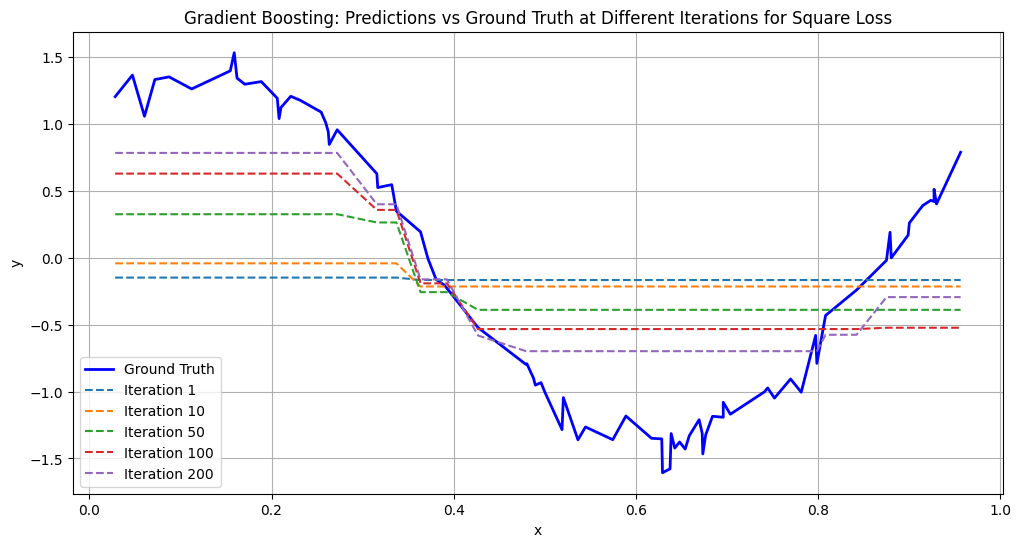

In [35]:
#Plotting training predictions vs iterations for test set for square loss
gradient_boost_sl("SL")
plt.figure(figsize=(12, 6))
# Sort the train_x and corresponding train_y for a smooth ground truth line
sorted_idx = np.argsort(train_x)
x_sorted = train_x[sorted_idx]
y_sorted = train_y[sorted_idx]
plt.plot(x_sorted, y_sorted, color='blue', label='Ground Truth', linewidth=2)
# Create dense input for smooth prediction curves
x_dense = np.sort(train_x)
# Plot prediction lines at different iterations
for iter in [1, 10, 50, 100, 200]:
    preds = predict(x_dense, iter)
    plt.plot(x_dense, preds, label=f'Iteration {iter}', linestyle='--')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient Boosting: Predictions vs Ground Truth at Different Iterations for Square Loss')
plt.legend()
plt.grid(True)
plt.show()


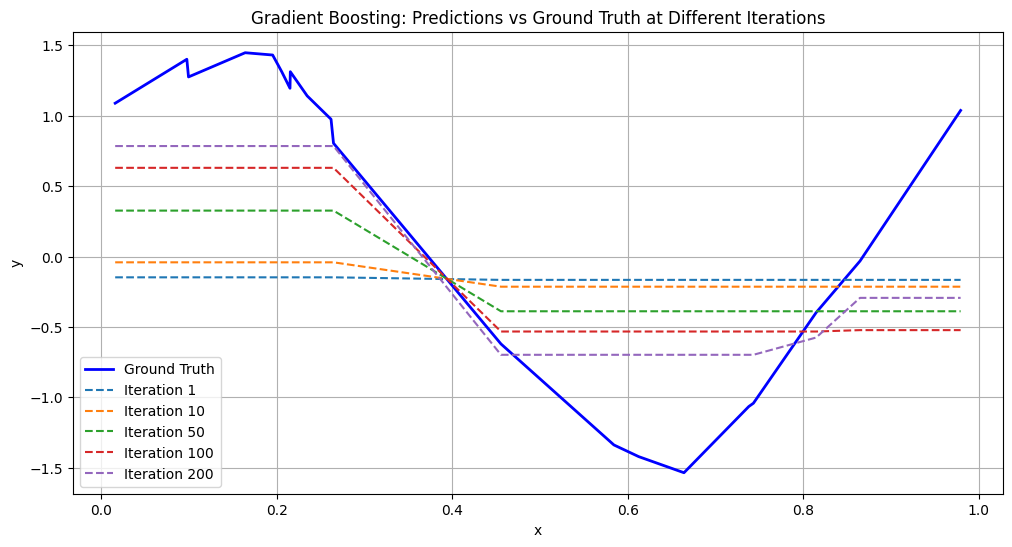

In [36]:
plt.figure(figsize=(12, 6))
# Sort the train_x and corresponding test_y for a smooth ground truth line
sorted_idx = np.argsort(test_x)
x_sorted = test_x[sorted_idx]
y_sorted = test_y[sorted_idx]
plt.plot(x_sorted, y_sorted, color='blue', label='Ground Truth', linewidth=2)
# Create dense input for smooth prediction curves
x_dense = np.sort(test_x)
# Plot prediction lines at different iterations
for iter in [1, 10, 50, 100, 200]:
    preds = predict(x_dense, iter)
    plt.plot(x_dense, preds, label=f'Iteration {iter}', linestyle='--')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient Boosting: Predictions vs Ground Truth at Different Iterations')
plt.legend()
plt.grid(True)
plt.show()


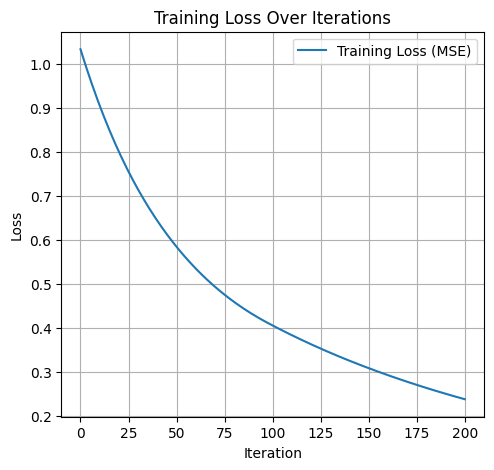

In [37]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(losses, label="Training Loss (MSE)")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Training Loss Over Iterations")
plt.grid(True)
plt.legend()


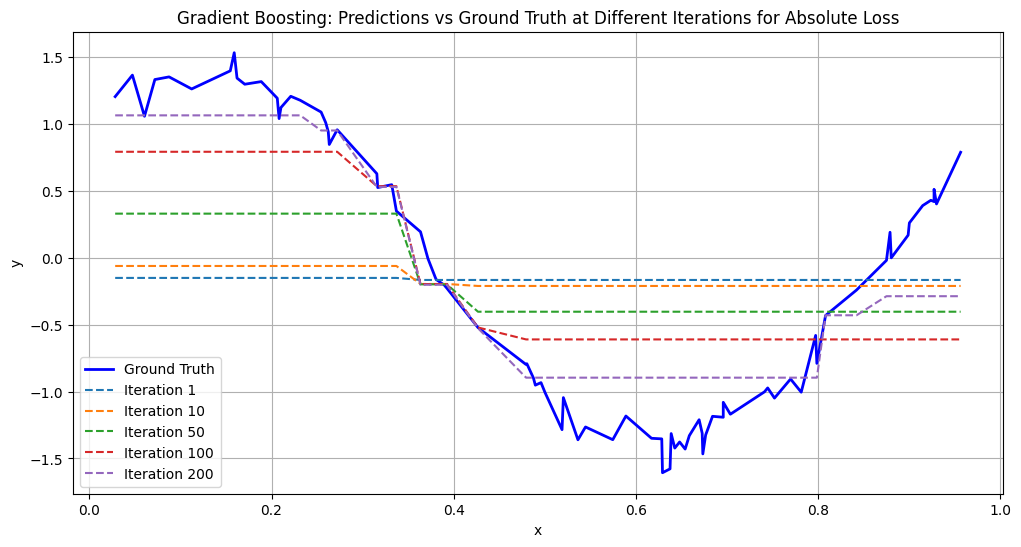

In [38]:
#Plotting training predictions vs iterations for test set for Absolute loss
gradient_boost_sl("AL")
plt.figure(figsize=(12, 6))
# Sort the train_x and corresponding train_y for a smooth ground truth line
sorted_idx = np.argsort(train_x)
x_sorted = train_x[sorted_idx]
y_sorted = train_y[sorted_idx]
plt.plot(x_sorted, y_sorted, color='blue', label='Ground Truth', linewidth=2)
# Create dense input for smooth prediction curves
x_dense = np.sort(train_x)
# Plot prediction lines at different iterations
for iter in [1, 10, 50, 100, 200]:
    preds = predict(x_dense, iter)
    plt.plot(x_dense, preds, label=f'Iteration {iter}', linestyle='--')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient Boosting: Predictions vs Ground Truth at Different Iterations for Absolute Loss')
plt.legend()
plt.grid(True)
plt.show()


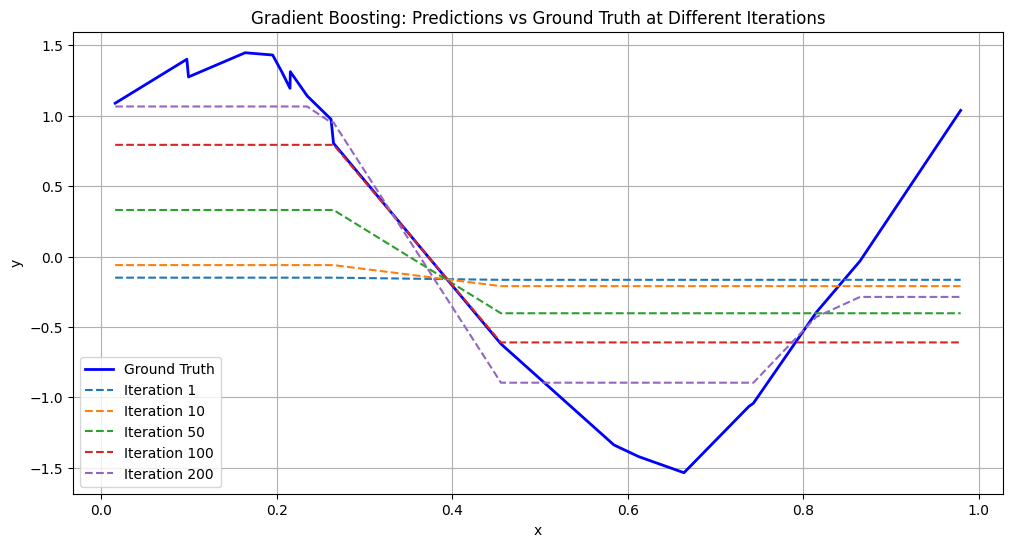

In [39]:
plt.figure(figsize=(12, 6))
# Sort the train_x and corresponding train_y for a smooth ground truth line
sorted_idx = np.argsort(test_x)
x_sorted = test_x[sorted_idx]
y_sorted = test_y[sorted_idx]
plt.plot(x_sorted, y_sorted, color='blue', label='Ground Truth', linewidth=2)
# Create dense input for smooth prediction curves
x_dense = np.sort(test_x)
# Plot prediction lines at different iterations
for iter in [1, 10, 50, 100, 200]:
    preds = predict(x_dense, iter)
    plt.plot(x_dense, preds, label=f'Iteration {iter}', linestyle='--')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient Boosting: Predictions vs Ground Truth at Different Iterations')
plt.legend()
plt.grid(True)
plt.show()


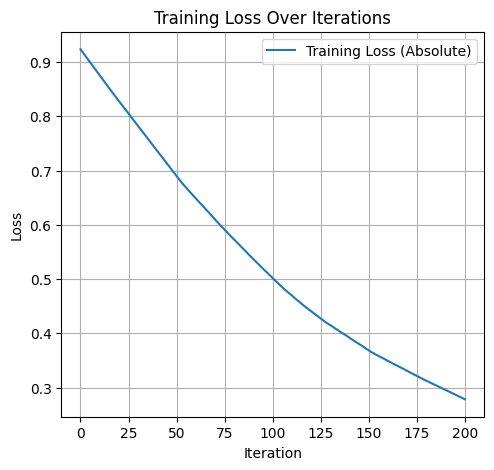

In [40]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(losses, label="Training Loss (Absolute)")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Training Loss Over Iterations")
plt.grid(True)
plt.legend()
